In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

In [ ]:
train_df = pd.read_parquet(glob.glob('/data/dajiang/smart-pixels/dataset_3sr/shuffled/dataset_3sr_50x12P5_parquets/contained/recon3D/train/*'))
val_df = pd.read_parquet(glob.glob('/data/dajiang/smart-pixels/dataset_3sr/shuffled/dataset_3sr_50x12P5_parquets/contained/recon3D/validation/*'))
df = pd.concat([train_df, val_df])

/tmp/ipykernel_1114814/2277469599.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


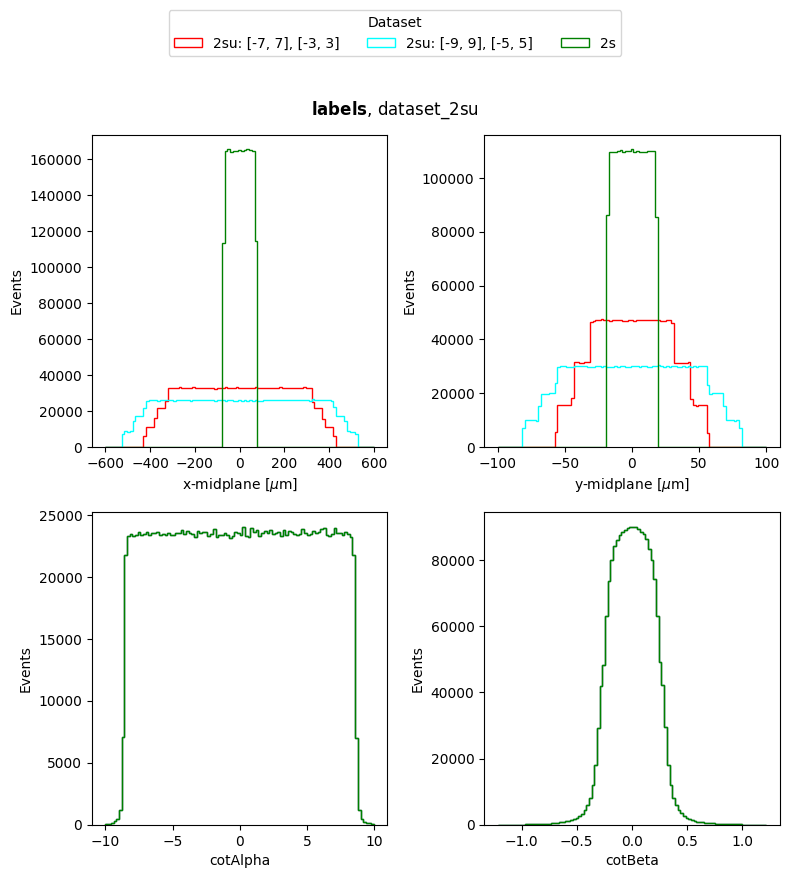

In [5]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
bins_x = np.linspace(-600,600,100)
bins_y = np.linspace(-100,100,100)

ax[0,0].hist(labels_df_1['x-midplane'],bins=bins_x,histtype='step',label='2su: [-7, 7], [-3, 3]', color='red')
ax[0,0].hist(labels_df_2['x-midplane'],bins=bins_x,histtype='step',label='2su: [-9, 9], [-5, 5]', color='cyan')
ax[0,0].hist(labels_df_3['x-midplane'],bins=bins_x,histtype='step',label='2s', color='green')
ax[0,0].set_xlabel('x-midplane [$\mu$m]')
ax[0,0].set_ylabel('Events')

ax[0,1].hist(labels_df_1['y-midplane'],bins=bins_y,histtype='step', color='red')
ax[0,1].hist(labels_df_2['y-midplane'],bins=bins_y,histtype='step', color='cyan')
ax[0,1].hist(labels_df_3['y-midplane'],bins=bins_y,histtype='step', color='green')
ax[0,1].set_xlabel('y-midplane [$\mu$m]')
ax[0,1].set_ylabel('Events')

ax[1,0].hist(labels_df_1['cotAlpha'],bins=100,histtype='step', color='red')
ax[1,0].hist(labels_df_2['cotAlpha'],bins=100,histtype='step', color='cyan')
ax[1,0].hist(labels_df_3['cotAlpha'],bins=100,histtype='step', color='green')
ax[1,0].set_xlabel('cotAlpha')
ax[1,0].set_ylabel('Events')

ax[1,1].hist(labels_df_1['cotBeta'],bins=100,histtype='step', color='red')
ax[1,1].hist(labels_df_2['cotBeta'],bins=100,histtype='step', color='cyan')
ax[1,1].hist(labels_df_3['cotBeta'],bins=100,histtype='step', color='green')
ax[1,1].set_xlabel('cotBeta')
ax[1,1].set_ylabel('Events')

fig.suptitle(r'$\mathbf{{labels}}$, {}'.format(dataset))
fig.legend(title='Dataset', loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.1))
fig.tight_layout()
fig.savefig('/home/dajiang/smart-pixels-ml/plots/{}_plots/validation/{}_labels.png'.format(dataset,dataset),  bbox_inches='tight', dpi=300)
fig.show()

/tmp/ipykernel_1114814/3804342647.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


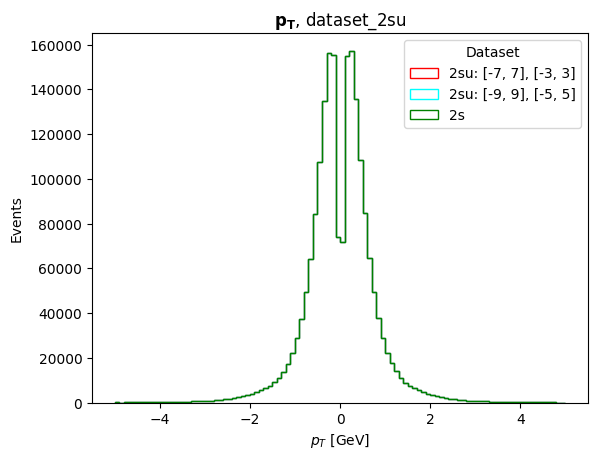

In [6]:
fig, ax = plt.subplots()

ax.hist(labels_df_1['pt'],bins=100,histtype='step',label='2su: [-7, 7], [-3, 3]', color='red')
ax.hist(labels_df_2['pt'],bins=100,histtype='step',label='2su: [-9, 9], [-5, 5]', color='cyan')
ax.hist(labels_df_3['pt'],bins=100,histtype='step',label='2s', color='green')
ax.set_title(r'$\mathbf{{p_T}}$, {}'.format(dataset))
ax.set_xlabel('$p_T$ [GeV]')
ax.set_ylabel('Events')
ax.legend(title='Dataset')
fig.savefig('/home/dajiang/smart-pixels-ml/plots/{}_plots/validation/{}_pt.png'.format(dataset,dataset), dpi=300)
fig.show()

/tmp/ipykernel_1114814/493792183.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


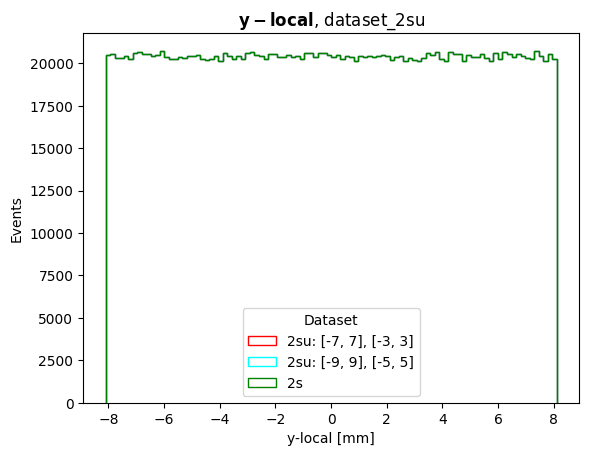

In [7]:
fig, ax = plt.subplots()

ax.hist(labels_df_1['y-local'],bins=100,histtype='step',label='2su: [-7, 7], [-3, 3]', color='red')
ax.hist(labels_df_2['y-local'],bins=100,histtype='step',label='2su: [-9, 9], [-5, 5]', color='cyan')
ax.hist(labels_df_3['y-local'],bins=100,histtype='step',label='2s', color='green')
ax.set_title(r'$\mathbf{{y-local}}$, {}'.format(dataset))
ax.set_xlabel('y-local [mm]')
ax.set_ylabel('Events')
ax.legend(title='Dataset')
fig.savefig('/home/dajiang/smart-pixels-ml/plots/{}_plots/validation/{}_y_local.png'.format(dataset,dataset), dpi=300)
fig.show()

In [7]:
f = open('/data/dajiang/smart-pixels/{}/{}_event_stats.txt'.format(dataset,dataset), 'w')
f.write('----{}----\n'.format(dataset))
f.write('3su, [-7 , 7], [-3, 3]: {} events\n'.format(len(labels_df_1)))
f.write('3su, [-9, 9], [-5, 5]: {} events\n'.format(len(labels_df_2)))
f.write('3s: {} events\n'.format(len(labels_df_3)))
f.close()